<a href="https://colab.research.google.com/github/AndresChavez123/Sys2025-2/blob/main/Tarea_09_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

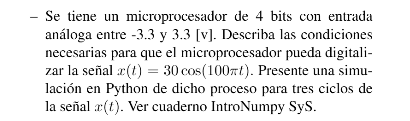

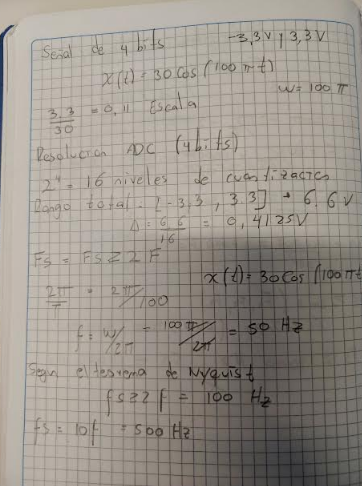

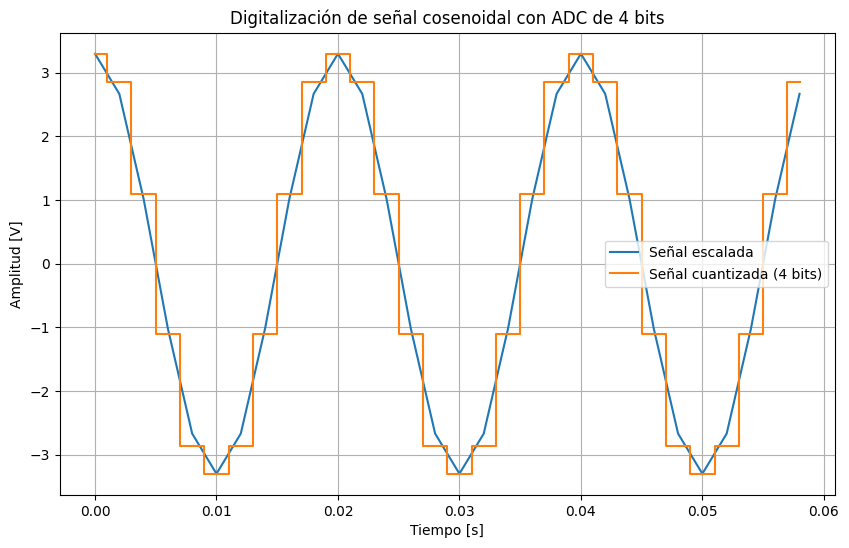

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Parámetros de la señal
Fo = 50              # frecuencia de la señal (Hz)
To = 1/Fo            # periodo
A = 30               # amplitud original
Fs = 10*Fo           # frecuencia de muestreo (satisface Nyquist)
Ts = 1/Fs
tv = np.arange(0,3*To,Ts)   # tres ciclos muestreados
y = A*np.cos(2*np.pi*Fo*tv) # señal original

# Escalado al rango del ADC [-3.3, 3.3]
ycs = (3.3/30) * y   # equivalente a my_ceropen pero directo

# Configuración del ADC
nbits = 4
rmin = -3.3
rmax =  3.3
ve = np.linspace(rmin, rmax, 2**nbits)  # vector de niveles de cuantización

# Distancias y asignación al nivel más cercano
d = cdist(ycs.reshape(-1,1), ve.reshape(-1,1))
indices = np.argmin(d, axis=1)   # índice del nivel más cercano
yq = ve[indices]                 # señal cuantizada

# Gráficas
plt.figure(figsize=(10,6))
plt.plot(tv, ycs, label="Señal escalada")
plt.step(tv, yq, where='mid', label="Señal cuantizada (4 bits)")
plt.title("Digitalización de señal cosenoidal con ADC de 4 bits")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.legend()
plt.grid()
plt.show()
